###**objective**

explore the mtl_trajet dataset to gain an understanding of any patterns within dataset by each mode of transport

####**dependencies + packages**

In [ ]:
!apt install gdal-bin python-gdal python3-gdal 
# install rtree - geopandas requirement
!apt install python3-rtree 
# install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# install descartes - geopandas requirement
!pip install descartes 
!pip install haversine
!pip install vincenty

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-

In [ ]:
from haversine import haversine, Unit
from scipy import stats
from shapely.geometry import LineString, MultiLineString
from vincenty import vincenty

import datetime
import geopandas as gpd
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
import os
import pandas as pd

plt.style.use('ggplot')

####**functions**

In [ ]:
# create formatter to include comma within '000s
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s

In [ ]:
# create bvar plot with subplots shared axis
def create_bar_multi_shared_axis(fig_size, rows, cols, transport_mode, crosstab, main_title, savefile):
  fig = plt.figure(figsize = fig_size)
  spec = gs.GridSpec(nrows= rows, ncols= cols, figure= fig)

  y_format = tkr.FuncFormatter(func)  # make formatter

  for j in range(len(transport_mode)):
    if j == 0:
      main_ax = fig.add_subplot(spec[j])
      main_ax.bar(crosstab.index, crosstab[transport_mode[j]], alpha = 0.5)
      main_ax.set_title(transport_mode_ranked[j])
      main_ax.yaxis.set_major_formatter(y_format)

    else:
      off_ax = fig.add_subplot(spec[j], sharex = main_ax, sharey = main_ax)
      off_ax.bar(crosstab.index, crosstab[transport_mode[j]], alpha = 0.5)
      off_ax.set_title(transport_mode_ranked[j])
      off_ax.yaxis.set_major_formatter(y_format)

  fig.tight_layout()
  fig.subplots_adjust(top=0.85)
  fig.suptitle(main_title, fontsize = 20)

  if savefile == True:
    filename = main_title + '.png'
    plt.savefig(filename)

In [ ]:
# create histogram with subplots shared axis
def create_hist_multi_shared_axis(fig_size, rows, cols, transport_mode, sub_data, filter_by, num_bins, main_title, savefile):
  fig = plt.figure(figsize = fig_size)
  spec = gs.GridSpec(nrows= rows, ncols= cols, figure= fig)

  y_format = tkr.FuncFormatter(func)  # make formatter

  for j in range(len(transport_mode_ranked)):
    subset = sub_data[filter_by == transport_mode[j]]

    if j == 0:
      main_ax = fig.add_subplot(spec[j])
      main_ax.hist(list(subset), alpha = 0.5, bins = num_bins)
      main_ax.set_title(transport_mode_ranked[j])
      main_ax.yaxis.set_major_formatter(y_format)

    else:
      off_ax = fig.add_subplot(spec[j], sharex = main_ax, sharey = main_ax)
      off_ax.hist(list(subset), alpha = 0.5, bins = num_bins)
      off_ax.set_title(transport_mode_ranked[j])
      off_ax.yaxis.set_major_formatter(y_format)

  fig.tight_layout()
  fig.subplots_adjust(top=0.85)
  fig.suptitle(main_title, fontsize = 20)

  if savefile == True:
    filename = main_title + '.png'
    plt.savefig(filename)

In [ ]:
# create histogram with subplots shared axis
def create_hist_multi_shared_axis(fig_size, rows, cols, transport_mode, sub_data, filter_by, num_bins, main_title, savefile):
  fig = plt.figure(figsize = fig_size)
  spec = gs.GridSpec(nrows= rows, ncols= cols, figure= fig)

  y_format = tkr.FuncFormatter(func)  # make formatter

  for j in range(len(transport_mode_ranked)):
    subset = sub_data[filter_by == transport_mode[j]]

    if j == 0:
      main_ax = fig.add_subplot(spec[j])
      main_ax.hist(list(subset), alpha = 0.5, bins = num_bins)
      main_ax.set_title(transport_mode_ranked[j])
      main_ax.yaxis.set_major_formatter(y_format)

    else:
      off_ax = fig.add_subplot(spec[j], sharex = main_ax, sharey = main_ax)
      off_ax.hist(list(subset), alpha = 0.5, bins = num_bins)
      off_ax.set_title(transport_mode_ranked[j])
      off_ax.yaxis.set_major_formatter(y_format)

  fig.tight_layout()
  fig.subplots_adjust(top=0.85)
  fig.suptitle(main_title, fontsize = 20)

  if savefile == True:
    filename = main_title + '.png'
    plt.savefig(filename)

In [ ]:
# create histogram with subplots
def create_hist_multi(fig_size, rows, cols, transport_mode, sub_data, filter_by, num_bins, main_title, savefile):
  fig = plt.figure(figsize = fig_size)
  spec = gs.GridSpec(nrows= rows, ncols= cols, figure= fig)

  y_format = tkr.FuncFormatter(func)  # make formatter

  for j in range(len(transport_mode_ranked)):
    subset = sub_data[filter_by == transport_mode[j]]
    ax = plt.subplot(spec[j])
    ax.hist(list(subset), alpha = 0.5, bins = num_bins)
    ax.set_title(transport_mode_ranked[j])
    ax.yaxis.set_major_formatter(y_format)

  fig.tight_layout()
  fig.subplots_adjust(top=0.85)
  fig.suptitle(main_title, fontsize = 20)

  if savefile == True:
    filename = main_title + '.png'
    plt.savefig(filename)

In [ ]:
# create scatter plot with subplots
def create_scatter_multi(fig_size, rows, cols, transport_mode, x, y, filter_by, best_fit, main_title, main_y_title, savefile):
  fig = plt.figure(figsize = fig_size)
  spec = gs.GridSpec(nrows= rows, ncols= cols, figure= fig)

  y_format = tkr.FuncFormatter(func)  # make formatter

  for j in range(len(transport_mode_ranked)):
    subset_x = x[filter_by == transport_mode[j]]
    subset_y = y[filter_by == transport_mode[j]]
    ax = plt.subplot(spec[j])
    ax.scatter(subset_x, subset_y, alpha = 0.5)
    if best_fit != None:
      slope, intercept, r, p, stderr = stats.linregress(subset_x, subset_y)
      ax.plot(subset_x, intercept + slope * subset_x, 'b', alpha = 0.5)
      ax.set_title(transport_mode_ranked[j] + '\nr = ' + str(np.round(r, 4)))
    
    ax.set_title(transport_mode_ranked[j])
    ax.yaxis.set_major_formatter(y_format)

  fig.text(0, 0.45, main_y_title, rotation = 'vertical', va = 'center', fontsize = 14)
  fig.tight_layout()
  fig.subplots_adjust(top=0.85)
  fig.suptitle(main_title, fontsize = 20)

  if savefile == True:
    filename = main_title + '.png'
    plt.savefig(filename)

In [ ]:
# create scatter plot with subplots
def create_scatter_multi_shared_axis(fig_size, rows, cols, transport_mode, x, y, filter_by, best_fit, main_title, main_y_title, savefile):
  fig = plt.figure(figsize = fig_size)
  spec = gs.GridSpec(nrows= rows, ncols= cols, figure= fig)

  y_format = tkr.FuncFormatter(func)  # make formatter

  for j in range(len(transport_mode_ranked)):
    subset_x = x[filter_by == transport_mode[j]]
    subset_y = y[filter_by == transport_mode[j]]
    
    if j == 0:
      main_ax = fig.add_subplot(spec[j])
      main_ax.scatter(subset_x, subset_y, alpha = 0.5)
      
      if best_fit != None:
        slope, intercept, r, p, stderr = stats.linregress(subset_x, subset_y)
        main_ax.plot(subset_x, intercept + slope * subset_x, 'b', alpha = 0.5)
        main_ax.set_title(transport_mode_ranked[j] + '\nr = ' + str(np.round(r, 4)))
    
      main_ax.set_title(transport_mode_ranked[j])
      main_ax.yaxis.set_major_formatter(y_format)
    
    else:
      off_ax = fig.add_subplot(spec[j], sharex = main_ax, sharey = main_ax)
      off_ax.scatter(subset_x, subset_y, alpha = 0.5)

      if best_fit != None:
        slope, intercept, r, p, stderr = stats.linregress(subset_x, subset_y)
        off_ax.plot(subset_x, intercept + slope * subset_x, 'b', alpha = 0.5)
        off_ax.set_title(transport_mode_ranked[j] + '\nr = ' + str(np.round(r, 4)))
    
      off_ax.set_title(transport_mode_ranked[j])
      off_ax.yaxis.set_major_formatter(y_format)

  fig.text(0, 0.45, main_y_title, rotation = 'vertical', va = 'center', fontsize = 14)
  fig.tight_layout()
  fig.subplots_adjust(top=0.85)
  fig.suptitle(main_title, fontsize = 20)

  if savefile == True:
    filename = main_title + '.png'
    plt.savefig(filename)

In [ ]:
# get bin counts for histograms
def get_bin_counts_hist(dataset, num_bins):
  counts, bin_edges = np.histogram(dataset, num_bins)

  return counts, bin_edges

In [ ]:
def merge_series_df(df, series_list, col_rename):
  for i in range(len(series_list)):
    df_series = pd.Series(series_list[i])
    df = pd.concat([df, df_series], axis = 1, sort= False)
    df = df.rename(columns= {0 : col_rename[i]})

  return df

####**mtl_trajet**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
# change directory
drive.mount('/content/drive', force_remount= True)
os.chdir('/content/drive/My Drive/MRP/to_be_submitted')

NameError: ignored

In [ ]:
# set path for geojson files
mtl_trajet_json = 'mtl_trajet_2017_MRP.geojson'

In [ ]:
mtl_trajet = gpd.read_file(mtl_trajet_json)

In [ ]:
print ('min date : {}'.format(mtl_trajet['starttime'].min()))
print ('max date : {}'.format(mtl_trajet['endtime'].max()))

min date : 2017-09-18T10:02:50
max date : 2017-10-18T03:53:18


In [ ]:
# convert to timeDelta
mtl_trajet['endtime'] = pd.to_datetime(mtl_trajet['endtime'])
mtl_trajet['starttime'] = pd.to_datetime(mtl_trajet['starttime'])

# calculate trip duration (min)
mtl_trajet['trip_duration'] = mtl_trajet['endtime'] - mtl_trajet['starttime']

# convert to seconds
mtl_trajet['trip_duration_secs'] = mtl_trajet['trip_duration'].dt.total_seconds().astype(int)

# convert to seconds
mtl_trajet['trip_duration_mins'] = mtl_trajet['trip_duration_secs'].astype(float)/60

# calculate day of week
mtl_trajet['day_of_week'] = mtl_trajet['starttime'].dt.dayofweek

# calculate hour of day
mtl_trajet['hour'] = mtl_trajet['starttime'].dt.hour

In [ ]:
# translate transport mode from french to english
transport_mode_fr = ['Voiture / Moto', 'Transport collectif', 'À pied', 'Vélo', 'Autopartage', 'Autre', 'Taxi', 'ND']
transport_mode_en = ['automobile', 'public_transportation', 'walk', 'bike', 'ride_share', 'other', 'taxi', 'na']

mtl_trajet['mode'].replace(to_replace = transport_mode_fr, value = transport_mode_en, inplace = True)

In [ ]:
# merge transport modes together
mtl_trajet['mode'] = mtl_trajet['mode'].str.replace('ride_share', 'automobile')
mtl_trajet['mode'] = mtl_trajet['mode'].str.replace('taxi', 'automobile')

mtl_trajet['mode'].unique()

array(['automobile', 'public_transportation', 'walk', 'bike', 'other',
       'na'], dtype=object)

In [ ]:
# frequency of each trip
mtl_trajet['mode'].value_counts()

automobile               24498
bike                     13448
public_transportation    12506
walk                     10543
other                      190
na                         157
Name: mode, dtype: int64

In [ ]:
# frequency of each trip
mtl_trajet['mode'].value_counts(normalize = True)

automobile               0.399367
bike                     0.219230
public_transportation    0.203873
walk                     0.171872
other                    0.003097
na                       0.002559
Name: mode, dtype: float64

In [ ]:
# because of low frequency, removing other/na from dataset
infrequent_trip_mode = ['other', 'na']

mtl_trajet = mtl_trajet[~mtl_trajet['mode'].isin(infrequent_trip_mode)]

mtl_trajet['mode'].unique()

array(['automobile', 'public_transportation', 'walk', 'bike'],
      dtype=object)

In [ ]:
print ('no. of trips : {}'.format(len(mtl_trajet)))

no. of trips : 60995


In [ ]:
# reset index
mtl_trajet = mtl_trajet.reset_index()
del mtl_trajet['index']

In [ ]:
# create list for transport mode ranked
transport_mode_ranked = mtl_trajet['mode'].value_counts().index.tolist()
transport_mode_ranked

['automobile', 'bike', 'public_transportation', 'walk']

####**histograms by transport mode**

In [ ]:
# get bin counts for histograms based on transport mode
num_bins = 25

np.set_printoptions(suppress= True)

for i in range(len(transport_mode_ranked)):
  counts, bin_edges = get_bin_counts_hist(mtl_trajet['trip_duration_secs'][mtl_trajet['mode'] == transport_mode_ranked[i]], num_bins)
  print ('{} : '.format(transport_mode_ranked[i]))
  print ('total trips : {}'.format(np.sum(counts)))
  print ('bin edges : {}'.format(bin_edges))
  print ('counts : {}\n'.format(counts))


automobile : 
total trips : 24498
bin edges : [   24.    1199.04  2374.08  3549.12  4724.16  5899.2   7074.24  8249.28
  9424.32 10599.36 11774.4  12949.44 14124.48 15299.52 16474.56 17649.6
 18824.64 19999.68 21174.72 22349.76 23524.8  24699.84 25874.88 27049.92
 28224.96 29400.  ]
counts : [11125  8533  3277   993   307   126    52    36    17     6     9     6
     1     1     3     0     0     1     0     1     3     0     0     0
     1]

bike : 
total trips : 13448
bin edges : [   30.    1044.68  2059.36  3074.04  4088.72  5103.4   6118.08  7132.76
  8147.44  9162.12 10176.8  11191.48 12206.16 13220.84 14235.52 15250.2
 16264.88 17279.56 18294.24 19308.92 20323.6  21338.28 22352.96 23367.64
 24382.32 25397.  ]
counts : [5607 4895 2155  517  133   53   28   21   11    6    5    3    3    3
    0    1    1    1    0    1    1    1    0    0    2]

public_transportation : 
total trips : 12506
bin edges : [   12.    1049.84  2087.68  3125.52  4163.36  5201.2   6239.04  7276.88
  8314

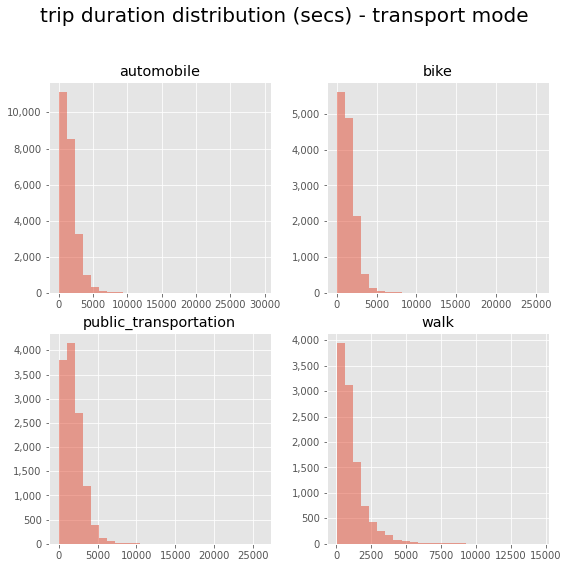

In [ ]:
# create histogram
# trip duration distribution (secs) - transport mode
create_hist_multi((8,8), 2, 2, transport_mode_ranked, 
                  mtl_trajet['trip_duration_secs'], mtl_trajet['mode'], 
                  25, 'trip duration distribution (secs) - transport mode', True)

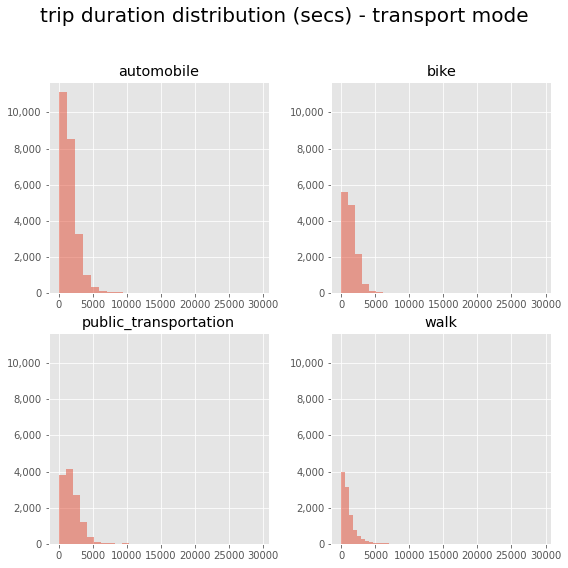

In [ ]:
# create histogram
# trip duration distribution (secs) - transport mode
create_hist_multi_shared_axis((8,8), 2, 2, transport_mode_ranked, 
                              mtl_trajet['trip_duration_secs'], mtl_trajet['mode'], 
                              25, 'trip duration distribution (secs) - transport mode', True)

In [ ]:
# get bin counts for histograms based on transport mode
num_bins = 25

np.set_printoptions(suppress= True)

for i in range(len(transport_mode_ranked)):
  counts, bin_edges = get_bin_counts_hist(mtl_trajet['trip_duration_mins'][mtl_trajet['mode'] == transport_mode_ranked[i]], num_bins)
  print ('{} : '.format(transport_mode_ranked[i]))
  print ('total trips : {}'.format(np.sum(counts)))
  print ('bin edges : {}'.format(bin_edges))
  print ('counts : {}\n'.format(counts))


automobile : 
total trips : 24498
bin edges : [  0.4    19.984  39.568  59.152  78.736  98.32  117.904 137.488 157.072
 176.656 196.24  215.824 235.408 254.992 274.576 294.16  313.744 333.328
 352.912 372.496 392.08  411.664 431.248 450.832 470.416 490.   ]
counts : [11125  8533  3277   993   307   126    52    36    17     6     9     6
     1     1     3     0     0     1     0     1     3     0     0     0
     1]

bike : 
total trips : 13448
bin edges : [  0.5         17.41133333  34.32266667  51.234       68.14533333
  85.05666667 101.968      118.87933333 135.79066667 152.702
 169.61333333 186.52466667 203.436      220.34733333 237.25866667
 254.17       271.08133333 287.99266667 304.904      321.81533333
 338.72666667 355.638      372.54933333 389.46066667 406.372
 423.28333333]
counts : [5607 4895 2155  517  133   53   28   21   11    6    5    3    3    3
    0    1    1    1    0    1    1    1    0    0    2]

public_transportation : 
total trips : 12506
bin edges : [  0.2  

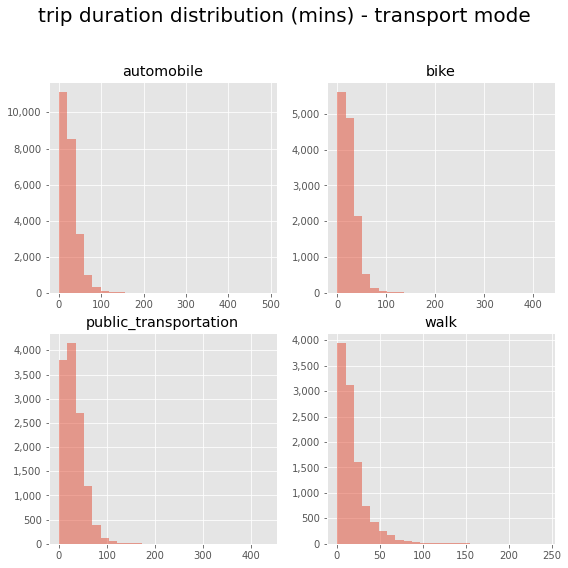

In [ ]:
# create histogram
# trip duration distribution (mins) - transport mode
create_hist_multi((8,8), 2, 2, transport_mode_ranked, 
                  mtl_trajet['trip_duration_mins'], mtl_trajet['mode'], 25, 
                  'trip duration distribution (mins) - transport mode', True)

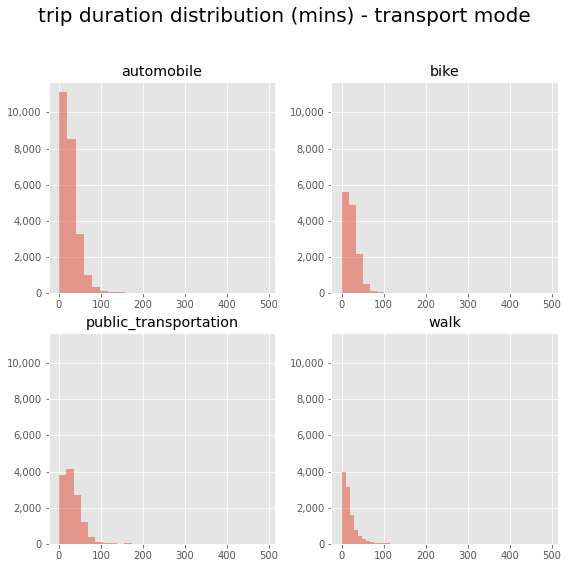

In [ ]:
# create histogram
# trip duration distribution (mins) - transport mode
create_hist_multi_shared_axis((8,8), 2, 2, transport_mode_ranked, 
                              mtl_trajet['trip_duration_mins'], mtl_trajet['mode'], 25, 
                              'trip duration distribution (mins) - transport mode', True)

####**hour and day distribution**

In [ ]:
mtl_trajet.columns

Index(['id_trip', 'starttime', 'endtime', 'mode', 'purpose', 'num_modes_trans',
       'trip_duration', 'trip_duration_secs', 'trip_duration_mins',
       'day_of_week', 'hour', 'num_linestring', 'start_region_id',
       'end_region_id', 'total_distance', 'num_coords_linestring',
       'total_coords', 'trip_start', 'trip_end', 'DAUID_start', 'CDUID_start',
       'CDNAME_start', 'ERUID_start', 'ERNAME_start', 'CMAUID_start',
       'CMAPUID_start', 'CMANAME_start', 'CTUID_start', 'CTNAME_start',
       'ADAUID_start', 'DAUID_end', 'CDUID_end', 'CDNAME_end', 'ERUID_end',
       'ERNAME_end', 'CMAUID_end', 'CMAPUID_end', 'CMANAME_end', 'CTUID_end',
       'CTNAME_end', 'ADAUID_end', 'geometry'],
      dtype='object')

In [ ]:
pd.crosstab(mtl_trajet['day_of_week'], mtl_trajet['mode'], margins= True)

mode,automobile,bike,public_transportation,walk,All
day_of_week,,,,,
0,3189,1792,1690,1253,7924
1,3509,2746,2311,1701,10267
2,3107,2283,2341,1449,9180
3,3265,2387,2305,1557,9514
4,3648,2320,2168,1814,9950
5,4086,1086,916,1472,7560
6,3694,834,775,1297,6600
All,24498,13448,12506,10543,60995


In [ ]:
# calcuate day of week distribution by each transport mode
for i in range(len(transport_mode_ranked)):
  day_percent = mtl_trajet['day_of_week'][mtl_trajet['mode'] == transport_mode_ranked[i]].value_counts(normalize = True).sort_index()
  print ('\nday of week distribtion (%) of trips - {}'.format(transport_mode_ranked[i]))
  print (day_percent)


day of week distribtion (%) of trips - automobile
0    0.130174
1    0.143236
2    0.126827
3    0.133276
4    0.148910
5    0.166789
6    0.150788
Name: day_of_week, dtype: float64

day of week distribtion (%) of trips - bike
0    0.133254
1    0.204194
2    0.169765
3    0.177499
4    0.172516
5    0.080756
6    0.062017
Name: day_of_week, dtype: float64

day of week distribtion (%) of trips - public_transportation
0    0.135135
1    0.184791
2    0.187190
3    0.184312
4    0.173357
5    0.073245
6    0.061970
Name: day_of_week, dtype: float64

day of week distribtion (%) of trips - walk
0    0.118847
1    0.161339
2    0.137437
3    0.147681
4    0.172057
5    0.139619
6    0.123020
Name: day_of_week, dtype: float64


In [ ]:
# calcuate hour of trip distribution by each transport mode
for i in range(len(transport_mode_ranked)):
  day_percent = mtl_trajet['hour'][mtl_trajet['mode'] == transport_mode_ranked[i]].value_counts(normalize = True).sort_index()
  print ('\nhour of trip distribtion (%) of trips - {}'.format(transport_mode_ranked[i]))
  print (day_percent)


hour of trip distribtion (%) of trips - automobile
0     0.051065
1     0.040575
2     0.028084
3     0.015307
4     0.010246
5     0.004817
6     0.002939
7     0.002572
8     0.001837
9     0.006735
10    0.022002
11    0.059760
12    0.059882
13    0.042167
14    0.043922
15    0.054249
16    0.059923
17    0.056290
18    0.058454
19    0.066005
20    0.088375
21    0.089313
22    0.075312
23    0.060168
Name: hour, dtype: float64

hour of trip distribtion (%) of trips - bike
0     0.034429
1     0.032421
2     0.020747
3     0.012716
4     0.008849
5     0.005131
6     0.002751
7     0.001933
8     0.001338
9     0.005651
10    0.022011
11    0.084845
12    0.125595
13    0.059860
14    0.027662
15    0.036957
16    0.039262
17    0.037998
18    0.038816
19    0.057555
20    0.099866
21    0.123067
22    0.075625
23    0.044914
Name: hour, dtype: float64

hour of trip distribtion (%) of trips - public_transportation
0     0.036462
1     0.036622
2     0.024628
3     0.014713
4    

In [ ]:
# create crosstab by day_of_week and hour 
pd.crosstab(mtl_trajet['hour'][mtl_trajet['mode'] == 'automobile'], mtl_trajet['day_of_week'][mtl_trajet['mode'] == 'automobile'], margins = True, normalize= 'all')

day_of_week,0,1,2,3,4,5,6,All
hour,,,,,,,,
0,0.005470,0.006694,0.008205,0.007021,0.009225,0.007960,0.006490,0.051065
1,0.004858,0.005021,0.006123,0.005062,0.005511,0.007062,0.006939,0.040575
2,0.003184,0.002735,0.003266,0.003633,0.004531,0.005225,0.005511,0.028084
3,0.001959,0.001592,0.001470,0.001470,0.001796,0.003674,0.003347,0.015307
4,0.000735,0.000735,0.000939,0.001143,0.001265,0.002286,0.003143,0.010246
5,0.000449,0.000245,0.000408,0.000367,0.000571,0.001143,0.001633,0.004817
6,0.000245,0.000245,0.000000,0.000122,0.000245,0.000980,0.001102,0.002939
7,0.000408,0.000122,0.000245,0.000286,0.000408,0.000367,0.000735,0.002572
8,0.000122,0.000204,0.000286,0.000082,0.000449,0.000367,0.000327,0.001837


In [ ]:
pd.crosstab(mtl_trajet['hour'], mtl_trajet['mode'], margins = True, normalize= 'all')

mode,automobile,bike,public_transportation,walk,All
hour,,,,,
0,0.020510,0.007591,0.007476,0.007591,0.043167
1,0.016296,0.007148,0.007509,0.005476,0.036429
2,0.011280,0.004574,0.005050,0.003820,0.024723
3,0.006148,0.002804,0.003017,0.002525,0.014493
4,0.004115,0.001951,0.001853,0.001361,0.009279
5,0.001935,0.001131,0.000443,0.000803,0.004312
6,0.001180,0.000607,0.000344,0.000410,0.002541
7,0.001033,0.000426,0.000230,0.000393,0.002082
8,0.000738,0.000295,0.000246,0.000066,0.001344


In [ ]:
mode_share_hour = pd.crosstab(mtl_trajet['hour'], mtl_trajet['mode'])
mode_share_hour

mode,automobile,bike,public_transportation,walk
hour,,,,
0,1251,463,456,463
1,994,436,458,334
2,688,279,308,233
3,375,171,184,154
4,251,119,113,83
5,118,69,27,49
6,72,37,21,25
7,63,26,14,24
8,45,18,15,4


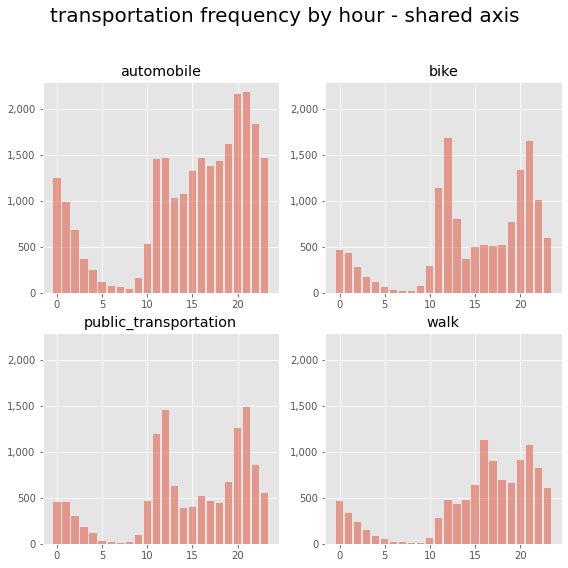

In [ ]:
create_bar_multi_shared_axis((8, 8), 2, 2, transport_mode_ranked, mode_share_hour, 'transportation frequency by hour - shared axis', True)

In [ ]:
print('no. of trips under 5 minutes : {}'.format(len(mtl_trajet[mtl_trajet['trip_duration_mins'] < 5])))
print('% of trips under 5 minutes : {}\n'.format(float(len(mtl_trajet[mtl_trajet['trip_duration_mins'] < 5])/float(len(mtl_trajet)))))

print('no. of trips between 5 - 10 minutes : {}'.format(len(mtl_trajet[(mtl_trajet['trip_duration_mins'] >= 5) & (mtl_trajet['trip_duration_mins'] < 10)])))
print('no. of trips under 10 minutes : {}'.format(len(mtl_trajet[mtl_trajet['trip_duration_mins'] < 10])))
print('% of trips between 5 - 10 minutes : {}'.format(float(len(mtl_trajet[(mtl_trajet['trip_duration_mins'] >= 5) & (mtl_trajet['trip_duration_mins'] < 10)])/float(len(mtl_trajet)))))
print('% of trips under 10 minutes : {}\n'.format(float(len(mtl_trajet[mtl_trajet['trip_duration_mins'] < 10])/float(len(mtl_trajet)))))

print('no. of trips between 5 - 10 minutes : {}'.format(len(mtl_trajet[(mtl_trajet['trip_duration_mins'] >= 10) & (mtl_trajet['trip_duration_mins'] < 15)])))
print('no. of trips under 15 minutes : {}'.format(len(mtl_trajet[mtl_trajet['trip_duration_mins'] < 15])))
print('% of trips between 10 - 15 minutes : {}'.format(float(len(mtl_trajet[(mtl_trajet['trip_duration_mins'] >= 10) & (mtl_trajet['trip_duration_mins'] < 15)])/float(len(mtl_trajet)))))
print('% of trips under 15 minutes : {}\n'.format(float(len(mtl_trajet[mtl_trajet['trip_duration_mins'] < 15])/float(len(mtl_trajet)))))

print('no. of trips between 15 - 20 minutes : {}'.format(len(mtl_trajet[(mtl_trajet['trip_duration_mins'] >= 15) & (mtl_trajet['trip_duration_mins'] < 20)])))
print('no. of trips under 20 minutes : {}'.format(len(mtl_trajet[mtl_trajet['trip_duration_mins'] < 20])))
print('% of trips between 15 - 20 minutes : {}'.format(float(len(mtl_trajet[(mtl_trajet['trip_duration_mins'] >= 15) & (mtl_trajet['trip_duration_mins'] < 20)])/float(len(mtl_trajet)))))
print('% of trips under 20 minutes : {}'.format(float(len(mtl_trajet[mtl_trajet['trip_duration_mins'] < 20])/float(len(mtl_trajet)))))

no. of trips under 5 minutes : 4367
% of trips under 5 minutes : 0.07159603246167719

no. of trips between 5 - 10 minutes : 8880
no. of trips under 10 minutes : 13247
% of trips between 5 - 10 minutes : 0.14558570374620872
% of trips under 10 minutes : 0.2171817362078859

no. of trips between 5 - 10 minutes : 8385
no. of trips under 15 minutes : 21632
% of trips between 10 - 15 minutes : 0.13747028444954504
% of trips under 15 minutes : 0.35465202065743096

no. of trips between 15 - 20 minutes : 7480
no. of trips under 20 minutes : 29112
% of trips between 15 - 20 minutes : 0.12263300270513977
% of trips under 20 minutes : 0.4772850233625707


####**distance distribution**

In [ ]:
# calculate total distance (km)
print ('total km measured : {}'.format(sum(mtl_trajet['total_distance'])))

total km measured : 401327.03295299824


In [ ]:
# calculate no. of line strings within multiline string
num_linestring = []
for idx, row in mtl_trajet.head().iterrows():
  num_linestring.append(len(row[6]))

num_linestring_series = pd.Series(num_linestring)

In [ ]:
# merge
mtl_trajet = pd.concat([mtl_trajet, num_linestring_series], axis = 1, sort= False)

# rename series
mtl_trajet = mtl_trajet.rename(columns={0: 'num_linestring'})

In [ ]:
mtl_trajet['num_linestring'].value_counts(normalize = True)

1      0.804263
3      0.051889
2      0.051857
4      0.014477
5      0.010706
         ...   
72     0.000016
59     0.000016
112    0.000016
80     0.000016
78     0.000016
Name: num_linestring, Length: 77, dtype: float64

In [ ]:
# calculate distances (km) within each LINESTRING
distances = []
total_distance = []
coords_trip = []
total_coords = []

for idx, row in mtl_trajet[['geometry', 'num_linestring']].iterrows():
  # collect distances within each MULTILINESTRING
  distance_trip = []
  coords = []
  for i in range(row[1]):
    # calculate no. of coordinates within LINESTRING
    num_coordinates = len(row[0][i].coords) - 1
    coords.append(num_coordinates + 1)
    # initialize distance
    distance = 0
    # loop through LINESTRING(s) within MULTILINESTRING and calculate vincenty distance
    for j in range(num_coordinates):
      pt1 = row[0][i].coords[j]
      pt2 = row[0][i].coords[j + 1]
      distance += vincenty((pt1[0], pt1[1]), (pt2[0], pt2[1]))
    distance_trip.append(distance)
  coords_trip.append(coords)

  distances.append(distance_trip)
  total_distance.append(sum(distance_trip))
  
  total_coords.append(sum(coords))

distances_series = pd.Series(distances)
total_distance_series = pd.Series(total_distance)
coords_series = pd.Series(coords_trip)
total_coords_series = pd.Series(total_coords)

In [ ]:
mtl_trajet = merge_series_df(mtl_trajet, [distances, total_distance, coords, total_coords], 
                             ['distances_linestring', 'total_distance', 'num_coords_linestring', 'total_coords'])

In [ ]:
mtl_trajet.head()

,id_trip,starttime,endtime,mode,purpose,num_modes_trans,trip_duration,trip_duration_secs,trip_duration_mins,day_of_week,hour,num_linestring,CDUID_start,CDNAME_start,CDUID_end,CDNAME_end,trip_start,trip_end,start_region_id,end_region_id,geometry,distances_linestring,total_distance,num_coords_linestring,total_coords
0,150744,2017-09-18 10:02:50,2017-09-18 10:17:12,automobile,Reconduire / aller chercher une personne,1.0,00:14:22,862,14.366667,0,10,1,2466,Montréal,2466,Montréal,POINT (-73.646385 45.54629),POINT (-73.646385 45.54629),54,54,"MULTILINESTRING ((-73.64638 45.54629, -73.6460...",[11.517727],11.517727,21.0,278
1,173651,2017-09-18 11:14:10,2017-09-18 12:01:46,automobile,Travail / Rendez-vous d'affaires,1.0,00:47:36,2856,47.600000,0,11,1,2473,Thérèse-De Blainville,2465,Laval,POINT (-73.81487199999999 45.644683),POINT (-73.81487199999999 45.644683),68,68,"MULTILINESTRING ((-73.81487 45.64468, -73.8146...",[14.498038000000014],14.498038,6.0,450
2,149086,2017-09-18 11:20:42,2017-09-18 12:10:14,public_transportation,Travail / Rendez-vous d'affaires,1.0,00:49:32,2972,49.533333,0,11,1,2466,Montréal,2466,Montréal,POINT (-73.563513 45.516447),POINT (-73.563513 45.516447),39,39,"MULTILINESTRING ((-73.56351 45.51645, -73.5634...",[6.784823000000005],6.784823,NaN,253
3,358412,2017-09-18 11:27:38,2017-09-18 11:40:26,walk,Travail / Rendez-vous d'affaires,1.0,00:12:48,768,12.800000,0,11,1,2466,Montréal,2466,Montréal,POINT (-73.590244 45.53261),POINT (-73.590244 45.53261),55,55,"MULTILINESTRING ((-73.59024 45.53261, -73.5903...",[0.8391390000000001],0.839139,NaN,58
4,35763,2017-09-18 11:32:54,2017-09-18 12:04:07,automobile,Magasinage / emplettes,1.0,00:31:13,1873,31.216667,0,11,1,2467,Roussillon,2467,Roussillon,POINT (-73.473197 45.40843),POINT (-73.473197 45.40843),24,24,"MULTILINESTRING ((-73.47320 45.40843, -73.4730...",[7.135372000000004],7.135372,NaN,234


In [ ]:
# get bin counts for histograms based on transport mode + distance
num_bins = 25

np.set_printoptions(suppress= True)

for i in range(len(transport_mode_ranked)):
  counts, bin_edges = get_bin_counts_hist(mtl_trajet['total_distance'][mtl_trajet['mode'] == transport_mode_ranked[i]], num_bins)
  print ('{} : '.format(transport_mode_ranked[i]))
  print ('total trips : {}'.format(np.sum(counts)))
  print ('bin edges : {}'.format(bin_edges))
  print ('counts : {}\n'.format(counts))

automobile : 
total trips : 24498
bin edges : [  0.           9.44401524  18.88803048  28.33204572  37.77606096
  47.2200762   56.66409144  66.10810668  75.55212192  84.99613716
  94.4401524  103.88416764 113.32818288 122.77219812 132.21621336
 141.6602286  151.10424384 160.54825908 169.99227432 179.43628956
 188.8803048  198.32432004 207.76833528 217.21235052 226.65636576
 236.100381  ]
counts : [14987  5320  2321   952   449   203   120    64    50    14     4     6
     3     3     0     0     0     1     0     0     0     0     0     0
     1]

bike : 
total trips : 13448
bin edges : [ 0.001642    3.29679432  6.59194664  9.88709896 13.18225128 16.4774036
 19.77255592 23.06770824 26.36286056 29.65801288 32.9531652  36.24831752
 39.54346984 42.83862216 46.13377448 49.4289268  52.72407912 56.01923144
 59.31438376 62.60953608 65.9046884  69.19984072 72.49499304 75.79014536
 79.08529768 82.38045   ]
counts : [6029 4094 1961  884  268  112   45   16   17    2    5    5    5    0
    0   

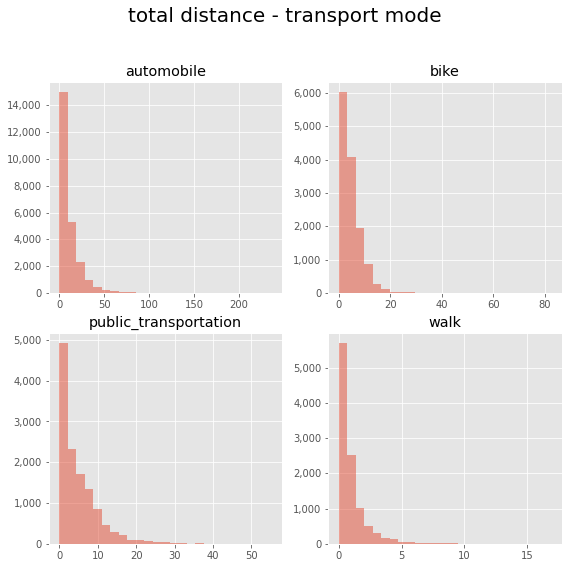

In [ ]:
# create histogram
# trip duration distribution (mins) - transport mode
create_hist_multi((8,8), 2, 2, transport_mode_ranked, 
                  mtl_trajet['total_distance'], mtl_trajet['mode'], 
                  25, 'total distance - transport mode', True)

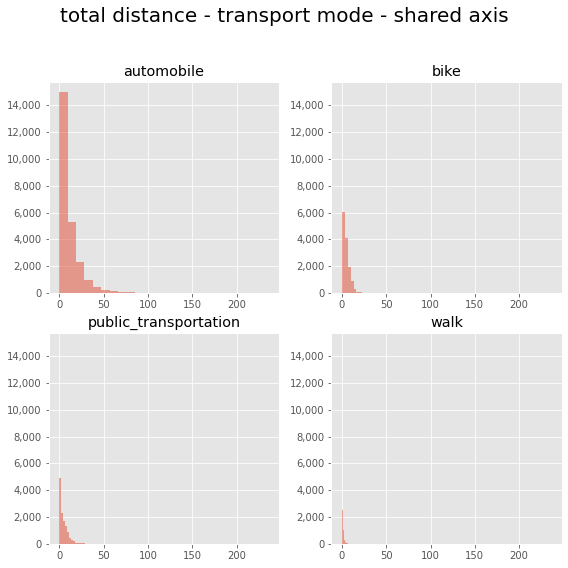

In [ ]:
# create histogram
# trip duration distribution (mins) - transport mode
create_hist_multi_shared_axis((8,8), 2, 2, transport_mode_ranked, 
                              mtl_trajet['total_distance'], mtl_trajet['mode'], 
                              25, 'total distance - transport mode - shared axis', True)

In [ ]:
# calculate overall correlation
corr = mtl_trajet['trip_duration_mins'].corr(mtl_trajet['total_distance'])

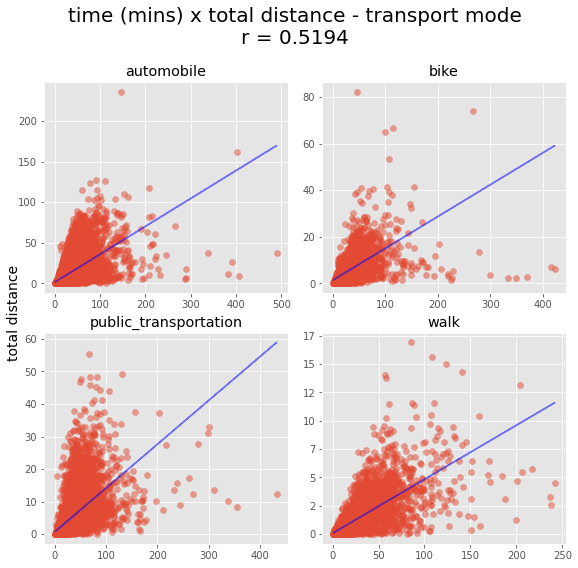

In [ ]:
# visualize time (mins) x total distance to gain understanding into relationship
create_scatter_multi((8,8), 2, 2, transport_mode_ranked, mtl_trajet['trip_duration_mins'], mtl_trajet['total_distance'], 
                     mtl_trajet['mode'], True, str('time (mins) x total distance - transport mode' + '\nr = ' + str(np.round(corr, 4))),
                     'total distance', False)

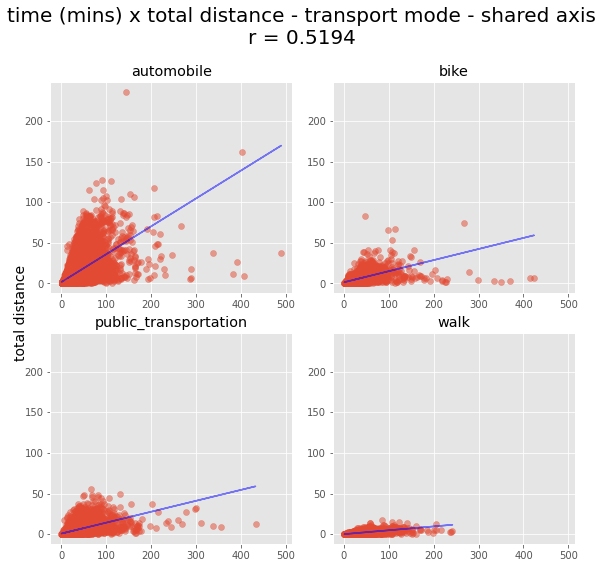

In [ ]:
# visualize time (mins) x total distance to gain understanding into relationship
create_scatter_multi_shared_axis((8,8), 2, 2, transport_mode_ranked, mtl_trajet['trip_duration_mins'], mtl_trajet['total_distance'], 
                     mtl_trajet['mode'], True, str('time (mins) x total distance - transport mode - shared axis' + '\nr = ' + str(np.round(corr, 4))),
                     'total distance', False)

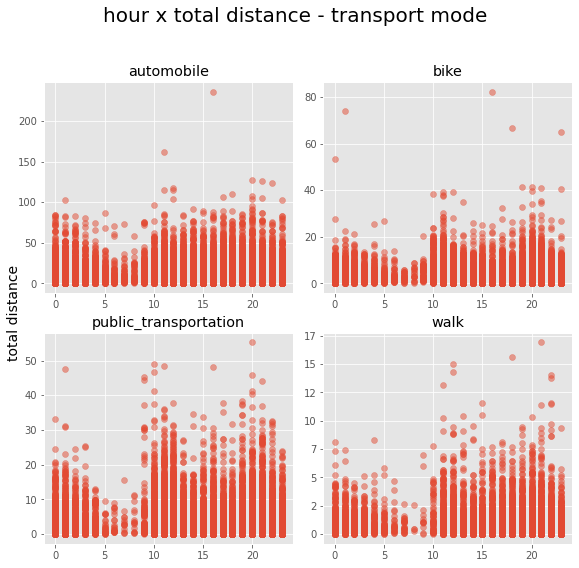

In [ ]:
# how much of an impact does the time of day have on distance traveled
create_scatter_multi((8,8), 2, 2, transport_mode_ranked, mtl_trajet['hour'], mtl_trajet['total_distance'], 
                     mtl_trajet['mode'], None, 'hour x total distance - transport mode',
                     'total distance', True)

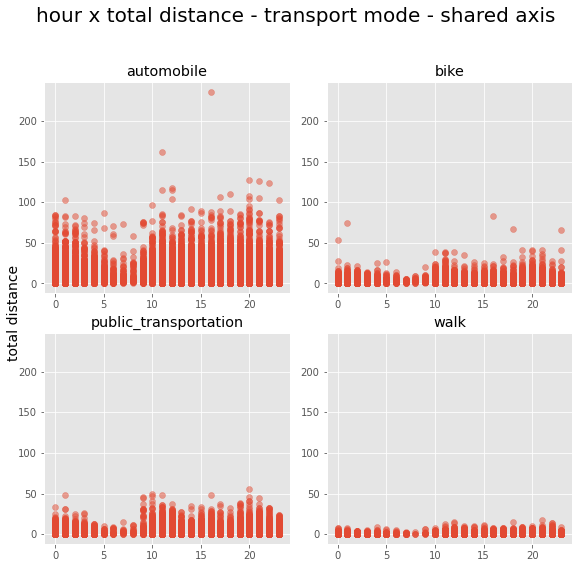

In [ ]:
# how much of an impact does the time of day have on distance traveled
create_scatter_multi_shared_axis((8,8), 2, 2, transport_mode_ranked, mtl_trajet['hour'], mtl_trajet['total_distance'], 
                                 mtl_trajet['mode'], None, 'hour x total distance - transport mode - shared axis',
                                 'total distance', True)

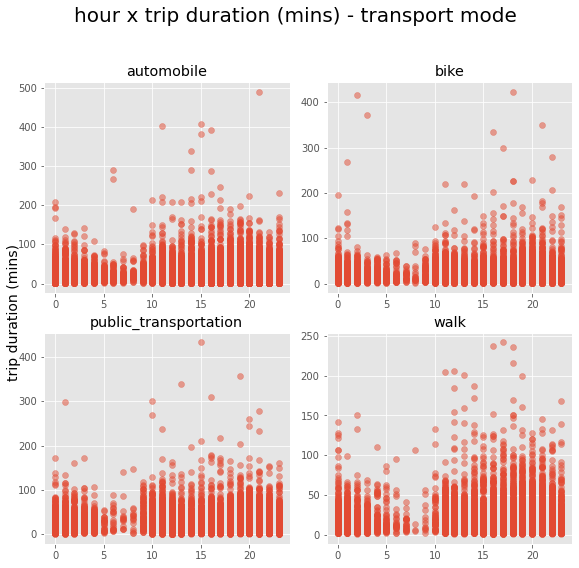

In [ ]:
# how much of an impact does the time of day have on trip duration
create_scatter_multi((8,8), 2, 2, transport_mode_ranked, mtl_trajet['hour'], mtl_trajet['trip_duration_mins'], 
                     mtl_trajet['mode'], None, 'hour x trip duration (mins) - transport mode',
                     'trip duration (mins)', True)

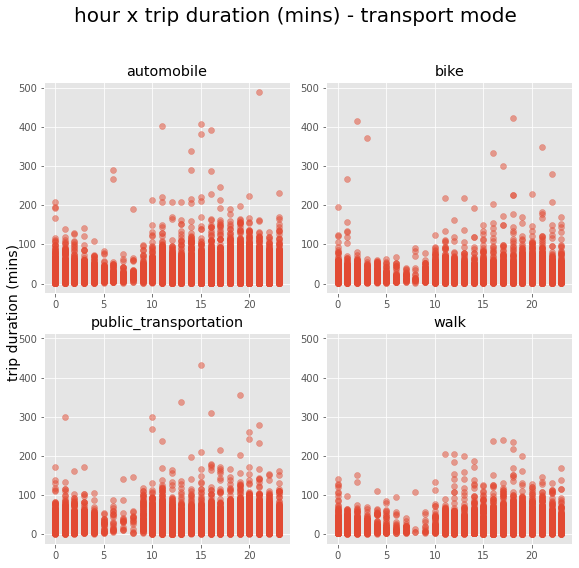

In [ ]:
# how much of an impact does the time of day have on trip duration
create_scatter_multi_shared_axis((8,8), 2, 2, transport_mode_ranked, mtl_trajet['hour'], mtl_trajet['trip_duration_mins'], 
                                 mtl_trajet['mode'], None, 'hour x trip duration (mins) - transport mode',
                                 'trip duration (mins)', True)

In [ ]:
# total time measured (mins)
print ('total time (hrs) measured : {}'.format(sum(mtl_trajet['trip_duration_mins'])/60))

total time (hrs) measured : 26239.636388889092


####**coords distribution**

In [ ]:
# speed of travel may impact the no. of coordinates collect, a quick EDA to see if this is true
# get bin counts for histograms based on transport mode + num coords
num_bins = 25

np.set_printoptions(suppress= True)

for i in range(len(transport_mode_ranked)):
  counts, bin_edges = get_bin_counts_hist(mtl_trajet['total_coords'][mtl_trajet['mode'] == transport_mode_ranked[i]], num_bins)
  print ('{} : '.format(transport_mode_ranked[i]))
  print ('total trips : {}'.format(np.sum(counts)))
  print ('bin edges : {}'.format(bin_edges))
  print ('counts : {}\n'.format(counts))

automobile : 
total trips : 24498
bin edges : [   2.    298.16  594.32  890.48 1186.64 1482.8  1778.96 2075.12 2371.28
 2667.44 2963.6  3259.76 3555.92 3852.08 4148.24 4444.4  4740.56 5036.72
 5332.88 5629.04 5925.2  6221.36 6517.52 6813.68 7109.84 7406.  ]
counts : [16364  6152  1730   217    27     5     1     1     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     1]

bike : 
total trips : 13448
bin edges : [   2.     99.96  197.92  295.88  393.84  491.8   589.76  687.72  785.68
  883.64  981.6  1079.56 1177.52 1275.48 1373.44 1471.4  1569.36 1667.32
 1765.28 1863.24 1961.2  2059.16 2157.12 2255.08 2353.04 2451.  ]
counts : [4492 3676 2494 1389  724  345  171   93   37   12    5    1    1    2
    2    2    1    0    0    0    0    0    0    0    1]

public_transportation : 
total trips : 12506
bin edges : [   2.     75.92  149.84  223.76  297.68  371.6   445.52  519.44  593.36
  667.28  741.2   815.12  889.04  962.96 1036.88 1110.8  1

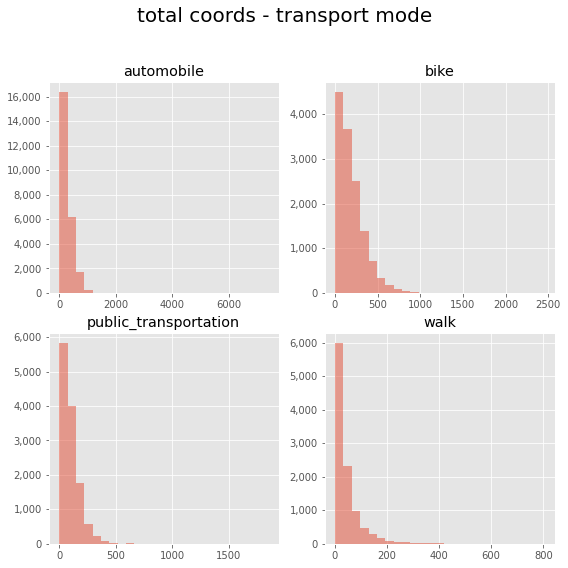

In [ ]:
# create histogram
# trip duration distribution (secs) - transport mode
create_hist_multi((8,8), 2, 2, transport_mode_ranked, 
                  mtl_trajet['total_coords'], mtl_trajet['mode'], 
                  25, 'total coords - transport mode', True)

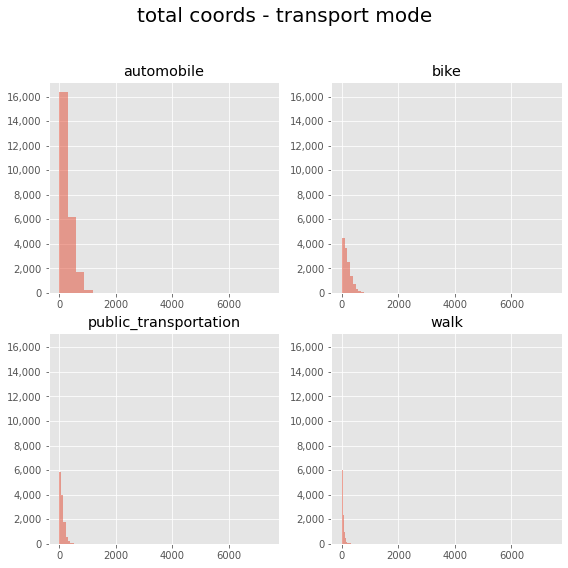

In [ ]:
# create histogram
# trip duration distribution (secs) - transport mode
create_hist_multi_shared_axis((8,8), 2, 2, transport_mode_ranked, 
                              mtl_trajet['total_coords'], mtl_trajet['mode'], 
                              25, 'total coords - transport mode', True)

####**other**

In [ ]:
mtl_trajet['mode'].unique()

array(['automobile', 'public_transportation', 'walk', 'bike'],
      dtype=object)

In [ ]:
mtl_trajet['mode'].value_counts()/len(mtl_trajet['mode'])

automobile               0.401639
bike                     0.220477
public_transportation    0.205033
walk                     0.172850
Name: mode, dtype: float64

####**export file**

In [ ]:
mtl_trajet['starttime'] = mtl_trajet['starttime'].astype(str) # datetime64[ns]
mtl_trajet['endtime'] = mtl_trajet['endtime'].astype(str) # datetime64[ns]
mtl_trajet['trip_duration'] = mtl_trajet['trip_duration'].astype(str) # timedelta64[ns]
mtl_trajet['distances_linestring'] = mtl_trajet['distances_linestring'].astype(str)
mtl_trajet['num_coords_linestring'] = mtl_trajet['num_coords_linestring'].astype(str)

In [ ]:
mtl_trajet.columns

Index(['id_trip', 'starttime', 'endtime', 'mode', 'purpose', 'num_modes_trans',
       'geometry', 'trip_duration', 'trip_duration_secs', 'trip_duration_mins',
       'day_of_week', 'hour'],
      dtype='object')

In [ ]:
mtl_trajet.head()

,id_trip,starttime,endtime,mode,purpose,num_modes_trans,geometry,trip_duration,trip_duration_secs,trip_duration_mins,day_of_week,hour,num_linestring,distances_linestring,total_distance,num_coords_linestring,total_coords
0,150744,2017-09-18 10:02:50,2017-09-18 10:17:12,automobile,Reconduire / aller chercher une personne,1.0,"MULTILINESTRING ((-73.64638 45.54629, -73.6460...",0 days 00:14:22.000000000,862,14.366667,0,10,1,[11.47538913241468],11.475389,[278],278
1,173651,2017-09-18 11:14:10,2017-09-18 12:01:46,automobile,Travail / Rendez-vous d'affaires,1.0,"MULTILINESTRING ((-73.81487 45.64468, -73.8146...",0 days 00:47:36.000000000,2856,47.600000,0,11,1,[14.44417795843265],14.444178,[450],450
2,149086,2017-09-18 11:20:42,2017-09-18 12:10:14,public_transportation,Travail / Rendez-vous d'affaires,1.0,"MULTILINESTRING ((-73.56351 45.51645, -73.5634...",0 days 00:49:32.000000000,2972,49.533333,0,11,1,[6.759735566958777],6.759736,[253],253
3,358412,2017-09-18 11:27:38,2017-09-18 11:40:26,walk,Travail / Rendez-vous d'affaires,1.0,"MULTILINESTRING ((-73.59024 45.53261, -73.5903...",0 days 00:12:48.000000000,768,12.800000,0,11,1,[0.8360254605249008],0.836025,[58],58
4,350121,2017-09-18 11:31:56,2017-09-18 12:11:26,automobile,Travail / Rendez-vous d'affaires,1.0,"MULTILINESTRING ((-73.19818 45.55656, -73.1985...",0 days 00:39:30.000000000,2370,39.500000,0,11,2,"[16.86013897867431, 5.9269046223184345]",22.787044,"[704, 271]",975


In [ ]:
mtl_trajet.to_file('mtl_trajet_2017_MRP.geojson', driver = 'GeoJSON')